In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
# mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [3]:
from utils import (
    adf_test,
    kpss_test,
    forecast_accuracy
)


In [4]:
ts_prices_eth = pd.read_csv("Data/Time_Series/prices/ethereum_19_22.csv",index_col='date',parse_dates=['date'])

In [5]:
ts_prices_eth = ts_prices_eth[ts_prices_eth.index.year == 2022]

In [6]:
ts_prices_eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [7]:
df=ts_prices_eth
# Checking for Stationarity
for i in range(0,len(df.columns)):
    # fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
    # ax1, ax2 = axes.flatten()
    print('Series:', df.columns[i])
    # plot_acf(ts_prices_eth.iloc[1:,i], lags=60, zero=False, alpha=.05, title='Autocorrelation Plot', ax=ax1)
    # plot_pacf(ts_prices_eth.iloc[1:,i], lags=60, zero=False, alpha=.05, title='Partial Autocorrelation Plot', ax=ax2)
    # plt.show()
    adf_test(df.iloc[:,i])
    kpss_test(df.iloc[:,i])
    print("*"*100)

Series: price
Augmented Dicky Fuller Test
	Result: The series is non-stationary
KPSS Test
	Result: The series is non-stationary
****************************************************************************************************


/Users/nikshubhakumar/Documents/thesis/Project/utils.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [9]:
df_first_differenced = df.diff().dropna()
print('Length of Total data: ', len(df_first_differenced))
train_length = int(len(df_first_differenced) * 0.8)
train_data = df_first_differenced[:train_length]
test_data = df_first_differenced[train_length:]
print('Train and Test data length: ', len(train_data), len(test_data))

Length of Total data:  364
Train and Test data length:  291 73


In [10]:
# Checking for Stationarity
for i in range(0,len(df_first_differenced.columns)):
    # fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
    # ax1, ax2 = axes.flatten()
    print('Series:', df_first_differenced.columns[i])
    # plot_acf(ts_prices_btc.iloc[1:,i], lags=60, zero=False, alpha=.05, title='Autocorrelation Plot', ax=ax1)
    # plot_pacf(ts_prices_btc.iloc[1:,i], lags=60, zero=False, alpha=.05, title='Partial Autocorrelation Plot', ax=ax2)
    # plt.show()
    adf_test(df_first_differenced.iloc[:,i])
    kpss_test(df_first_differenced.iloc[:,i])
    print("*"*100)

Series: price
Augmented Dicky Fuller Test
	Result: The series is stationary
KPSS Test
	Result: The series is stationary
****************************************************************************************************


/Users/nikshubhakumar/Documents/thesis/Project/utils.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [11]:
price = df_first_differenced.price.values

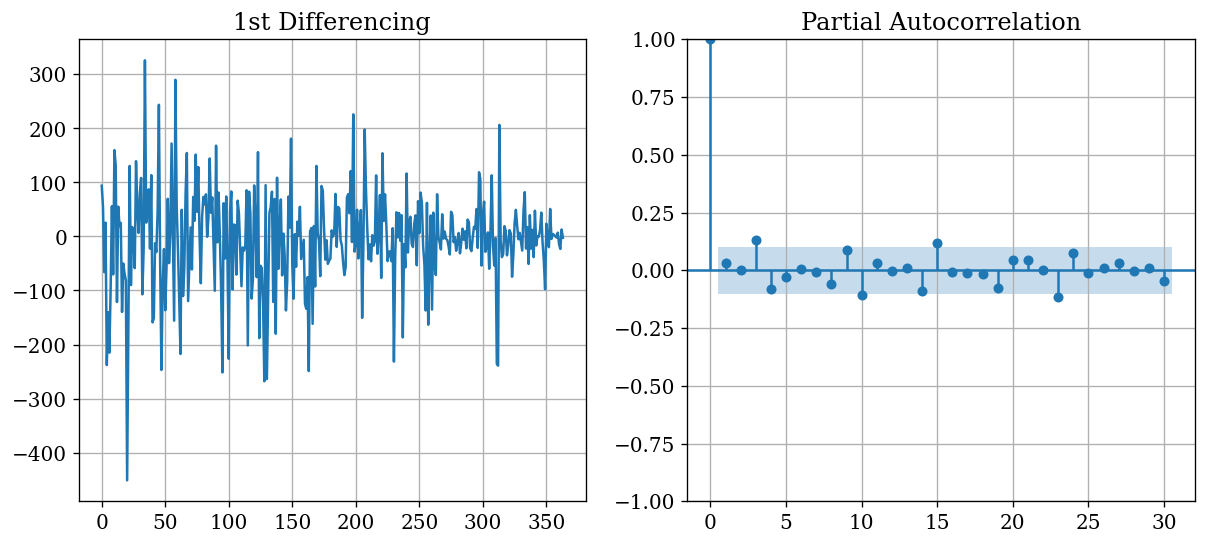

In [12]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(price); axes[0].set_title('1st Differencing')
axes[0].grid(True)
axes[1].set(ylim=(0,5))
plot_pacf(price, ax=axes[1],lags=30)
axes[1].grid(True)

plt.show()

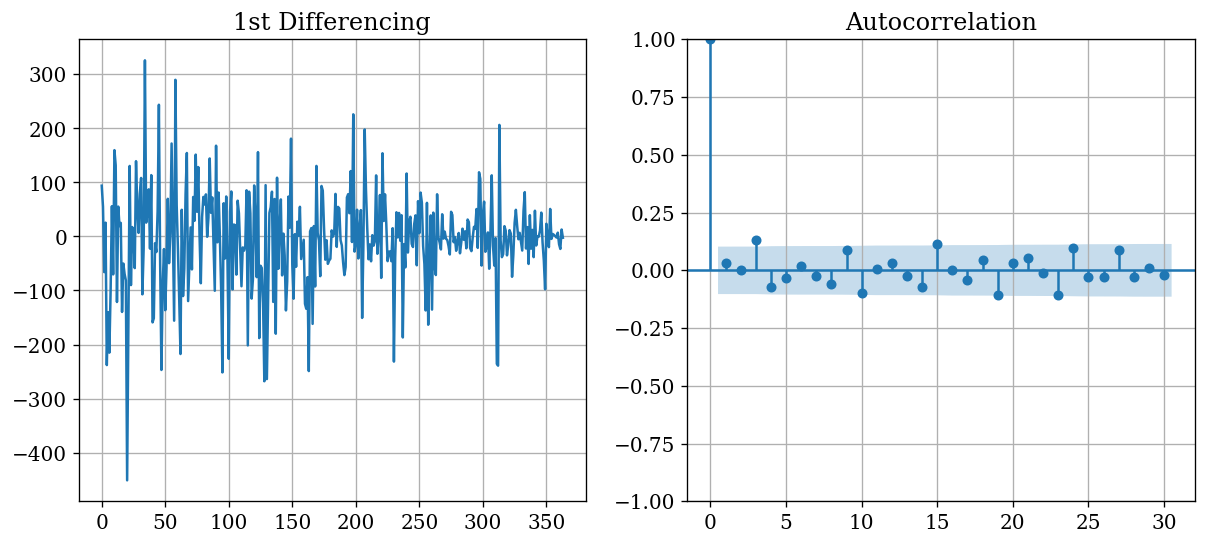

In [13]:
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(price); axes[0].set_title('1st Differencing')
axes[0].grid(True)
axes[1].set(ylim=(0,5))
plot_acf(price, ax=axes[1],lags=30)
axes[1].grid(True)

plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data["price"].values, order=(0,1,0))
model_fit = model.fit(low_memory = False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  291
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1830.736
Date:                Mon, 24 Jun 2024   AIC                           3663.472
Time:                        13:10:46   BIC                           3667.142
Sample:                             0   HQIC                          3664.942
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.782e+04   1352.603     13.172      0.000    1.52e+04    2.05e+04
Ljung-Box (L1) (Q):                  72.67   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.00   Pr

<Axes: xlabel='date'>

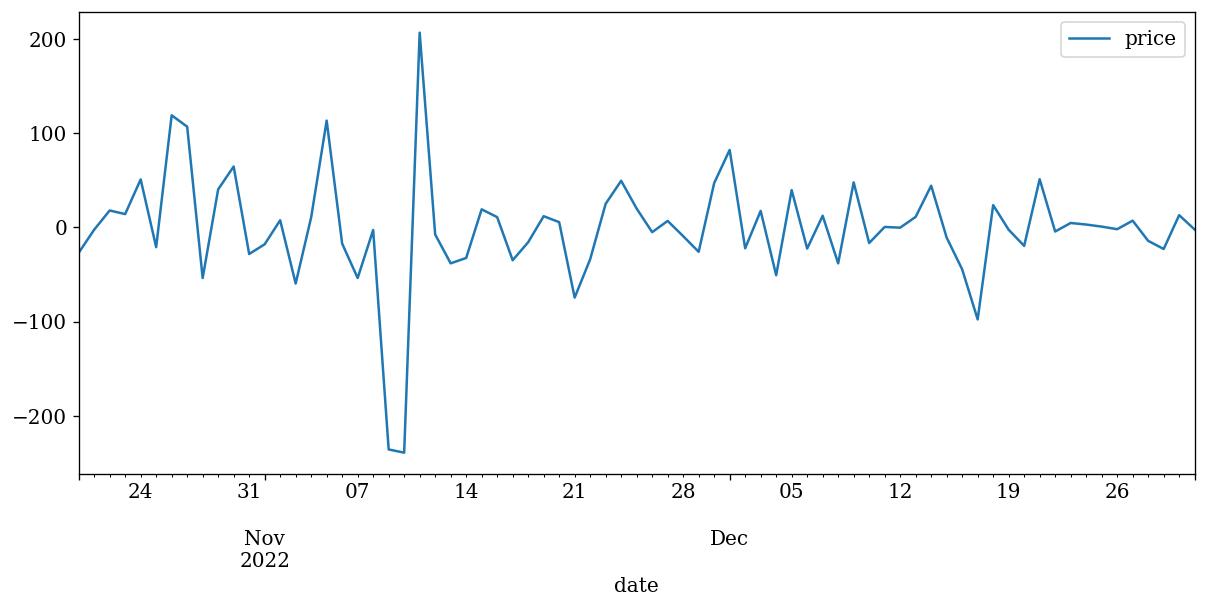

In [15]:
test_data.plot()

In [16]:
test_data.describe()

,price
count,73.000000
mean,-1.543836
std,60.891734
min,-239.110000
25%,-22.660000
50%,-2.070000
75%,17.760000
max,206.370000


In [17]:
df["forecast"] = df.price.shift(1)

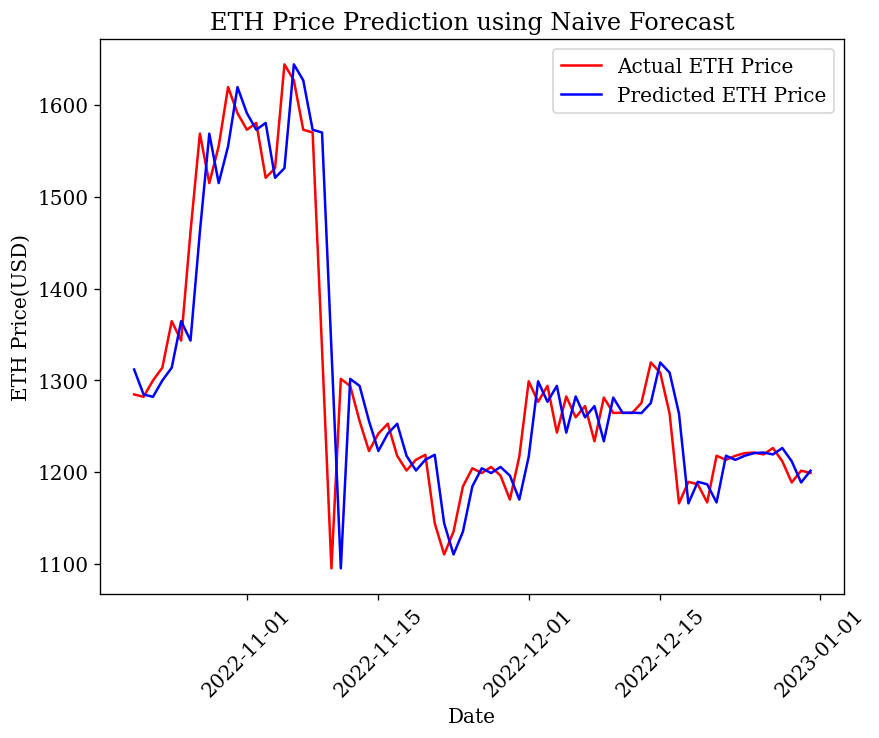

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(df['price'].iloc[-73:], color = 'red', label = 'Actual ETH Price')
plt.plot(df['forecast'].iloc[-73:], color = 'blue', label = 'Predicted ETH Price')
plt.title('ETH Price Prediction using Naive Forecast')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('ETH Price(USD)')
plt.legend()
plt.show()

In [19]:
print('Forecast Accuracy of: ETH Price')
# accuracy_prod = 
res = forecast_accuracy(df.price[291:], df.forecast[291:],['ETH (Baseline)'])
res

Forecast Accuracy of: ETH Price


,MAE,MAPE,MSE,RMSE
ETH (Baseline),36.949865,2.806071,3616.265993,60.135397
